# Matplotlib perusteita
<ul><li>Jos teen kuvion suoraan dataframesta (df.plot...), niin käytän pandas-kirjaston matplotlibin pohjalta rakennettua "viritelmää" kuvion teosta.
    <br>Lue lisää <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html" target="_blank">https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html</a></li>
<li>matplotlib.pyplot sisältää komentoja kuvion muotoiluun. Aivan kaikkea näillä komennoilla ei saa tehtyä. 
    <br>Lue lisää <a href="https://matplotlib.org/tutorials/introductory/pyplot.html" target="_blank">https://matplotlib.org/tutorials/introductory/pyplot.html</a></li>
<li>Vannoutuneet olio-ohjelmoijat käyttävät mieluummin kuvion luonnin palauttamaa Axes-luokan oliota kuvion muotoiluun.
    <br>Lue lisää <a href="https://matplotlib.org/api/axes_api.html" target="_blank">https://matplotlib.org/api/axes_api.html</a></li></ul>

In [1]:
#Tuon kirjastot:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Luon dataframen dictionarysta:
raw_data={'Alue': ['Helsinki', 'Turku', 'Tampere', 'Oulu'], 
          'Myynti': [1321847, 852669, 1032199, 568230]}
myynnit = pd.DataFrame(raw_data)

#Teen kaupungeista dataframen indeksin:
myynnit.index = myynnit['Alue']
myynnit

,Alue,Myynti
Alue,,
Helsinki,Helsinki,1321847
Turku,Turku,852669
Tampere,Tampere,1032199
Oulu,Oulu,568230


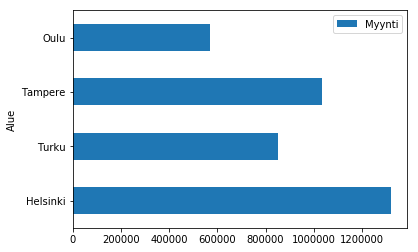

In [3]:
myynnit.plot.barh()

In [4]:
#Tyyleillä voin nopeasti muuttaa kaavion muotoiluasetuksia:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

[Text(0, 0, '0.0'),
 Text(0, 0, '0.2'),
 Text(0, 0, '0.4'),
 Text(0, 0, '0.6'),
 Text(0, 0, '0.8'),
 Text(0, 0, '1.0'),
 Text(0, 0, '1.2'),
 Text(0, 0, '1.4')]

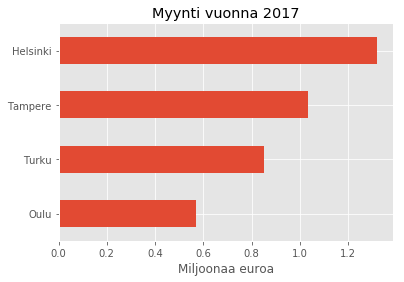

In [5]:
#Vaihdan tyyliasetuksen:
plt.style.use('ggplot')

#plot palauttaa Axes-luokan olion, joka mahdollistaa kuvion monipuolisen muotoilun:
ax1=myynnit.sort_values(by='Myynti').plot.barh(title='Myynti vuonna 2017', legend=False)

#Otsikot x-akselille ja y-akselille:
ax1.set(xlabel='Miljoonaa euroa', ylabel='')

#Haen x-akselin ticksit ja muotoilen miljooniksi yhdellä desimaalilla:
ax1.set_xticklabels(['{:.1f}'.format(x/1000000) for x in ax1.get_xticks()])

In [6]:
#Myynnit yhteensä:
n=myynnit['Myynti'].sum()

#Lisään sarakkeen, johon lasken prosenttiosuuden myynneistä yhteensä
myynnit['%'] = myynnit['Myynti'] / n * 100
myynnit

,Alue,Myynti,%
Alue,,,
Helsinki,Helsinki,1321847,35.016325
Turku,Turku,852669,22.587587
Tampere,Tampere,1032199,27.343418
Oulu,Oulu,568230,15.052670


[Text(0, 0, '0 %'),
 Text(0, 0, '5 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '15 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '25 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '35 %'),
 Text(0, 0, '40 %')]

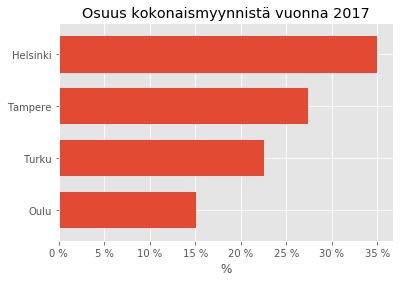

In [7]:
#width määrittää pylvään leveyden käytettävistä olevasta tilasta
ax2=myynnit.sort_values(by='%')['%'].plot.barh(title='Osuus kokonaismyynnistä vuonna 2017', 
                                              legend=False, width=0.7, color='C0')
ax2.set(xlabel='%', ylabel='')

ax2.set_xticklabels(['{:.0f} %'.format(x) for x in ax2.get_xticks()])

In [8]:
raw_data={'Alue': ['Helsinki', 'Turku', 'Tampere', 'Oulu'], 
          'Myynti 2017': [1321847, 852669, 1032199, 568230],
          'Myynti 2016': [1203434, 923450, 1023563, 542399]}
myynnit2 = pd.DataFrame(raw_data)
myynnit2.index = myynnit2['Alue']
myynnit2

,Alue,Myynti 2017,Myynti 2016
Alue,,,
Helsinki,Helsinki,1321847,1203434
Turku,Turku,852669,923450
Tampere,Tampere,1032199,1023563
Oulu,Oulu,568230,542399


[Text(0, 0.5, 'Euroa'), Text(0.5, 0, 'Alue')]

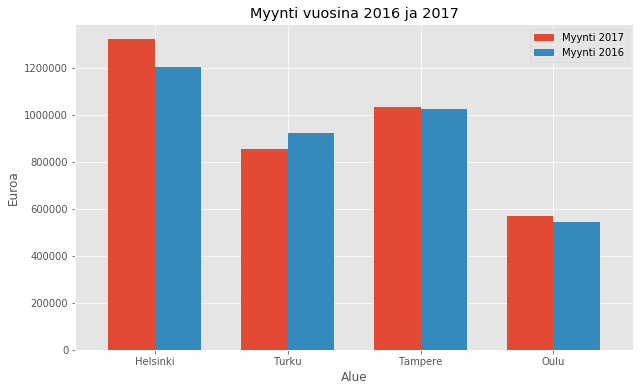

In [9]:
#figsize määrittää figure-olion koon. figure on suorakaide, jonka sisällä axes-olio sijaitsee.
#rot määrittää luokka-akselin nimiöiden asennon asteina.
#width määrittää pylväiden leveyden:
ax3=myynnit2.plot.bar(figsize=(10,6), title='Myynti vuosina 2016 ja 2017', rot=0, width=0.7)

ax3.set(xlabel='Alue', ylabel='Euroa')

[Text(0, 0.5, 'Euroa'), Text(0.5, 0, 'Alue')]

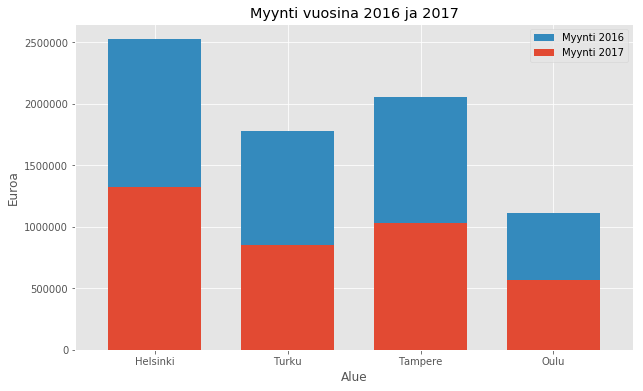

In [10]:
#legend='reverse' vaihtaa selitteen järjestyksen.
#stacked=True pinoaa pylväät päällekkäin:
ax4=myynnit2.plot.bar(figsize=(10,6), title='Myynti vuosina 2016 ja 2017', rot=0, width=0.7, 
                     legend='reverse', stacked=True)

ax4.set(xlabel='Alue', ylabel='Euroa')

In [11]:
df = pd.read_excel('http://www.elisanet.fi/taanila/data1.xlsx', sheet_name = 'Data')
df.head()

,nro,sukupuoli,ikä,perhe,koulutus,palvelusvuodet,palkka,tyytyväisyys johtoon,tyytyväisyys työtovereihin,tyytyväisyys työympäristöön,tyytyväisyys palkkaan,tyytyväisyys työtehtäviin,työterveyshuolto,lomaosake,kuntosali,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [12]:
#Sukupuolen ja koulutuksen ristiintaulukointi:
df1 = pd.crosstab(df['koulutus'], df['sukupuoli'], margins = True, normalize = 'columns')

df1.index = ['peruskoulu','2.aste','korkeakoulu','ylempi korkeakoulu']
df1.columns = ['mies','nainen','yhteensä']

df1

,mies,nainen,yhteensä
peruskoulu,0.354839,0.263158,0.333333
2.aste,0.370968,0.368421,0.370370
korkeakoulu,0.241935,0.368421,0.271605
ylempi korkeakoulu,0.032258,0.000000,0.024691


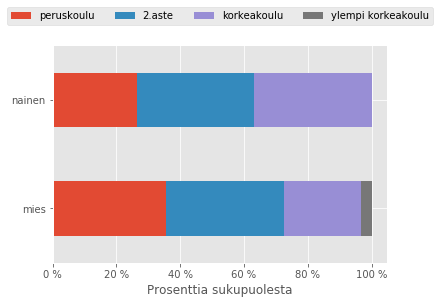

In [13]:
#T vaihtaa sarakkeet riveiksi.
#stacked=True pinoaa pylväät.
ax5=df1[['mies','nainen']].T.plot.barh(stacked=True)

ax5.set_xlabel('Prosenttia sukupuolesta')

#selitteen sijoittelun voi määrittää tarkasti.
#ncol=4, tarkoittaa, että selitteessä on neljä asiaa rinnakkain.
ax5.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4)

ax5.set_xticklabels(['{:.0f} %'.format(x*100) for x in ax5.get_xticks()])

#Kuvio on helppo tallentaa (gcf=get current figure):
plt.gcf().savefig('kuva.png')